# Autoencoder for Boson Sampling Experiments

In [1]:
import os
import numpy as np
import pickle
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from models.AED import Autoencoder

In [2]:
# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'boson/'
RUN_FOLDER = '../run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
print(RUN_FOLDER)

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

../run/vae/0001_boson/


In [33]:
modes   = 5
photons = 3

# load previously generated data from the Boson data generator
data_file = '../data/' + str(modes) + '_' + str(photons) + '_data.sav'

with open(data_file, "rb") as f:
    X, Y = pickle.load(f)
    
X = np.asarray(X)
Y = np.asarray(Y)

split = round(len(X)*.9)

x_train = X[:split]
y_train = Y[:split]

x_test  = X[split:]
y_test  = Y[split:]


In [34]:
AE = Autoencoder(
    input_dim = (x_train.shape[1],)
    , encoder_dense_layers = [64,64,32,128]
    , decoder_dense_layers = [64,64,32, 35]
    , z_dim = 16
    , use_dropout = False
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [35]:
AE.encoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 25)]              0         
_________________________________________________________________
encoder_dense_0 (Dense)      (None, 64)                1664      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 32)                0   

In [36]:
AE.decoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2176      
_________________________________________________________________
reshape_3 (Reshape)          (None, 128)               0         
_________________________________________________________________
decoder_dense_t_0 (Dense)    (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
decoder_dense_t_1 (Dense)    (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 64)                0  

In [38]:
LEARNING_RATE = 0.0003
BATCH_SIZE = 32
INITIAL_EPOCH = 0

AE.compile(LEARNING_RATE)

In [39]:
AE.train(     
    x_train, y_train
    , batch_size = BATCH_SIZE
    , epochs = 3000
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

AE.save(RUN_FOLDER)

Train on 3600 samples
Epoch 1/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 0.0636 - mae: 0.1623
Epoch 00001: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 266us/sample - loss: 0.0595 - mae: 0.1533
Epoch 2/3000
3584/3600 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0275
Epoch 00002: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 0s 135us/sample - loss: 0.0023 - mae: 0.0275
Epoch 3/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 0.0022 - mae: 0.0275
Epoch 00003: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 0s 129us/sample - loss: 0.0022 - mae: 0.0274
Epoch 4/3000
3232/3600 [=========================>....] - ETA: 0s - loss: 0.0022 - mae: 0.0272
Epoch 00004: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 0s 

Epoch 33/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 0.0016 - mae: 0.0241
Epoch 00033: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 209us/sample - loss: 0.0016 - mae: 0.0241
Epoch 34/3000
3488/3600 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0238
Epoch 00034: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 250us/sample - loss: 0.0015 - mae: 0.0238
Epoch 35/3000
3584/3600 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0234
Epoch 00035: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 386us/sample - loss: 0.0014 - mae: 0.0234
Epoch 36/3000
3488/3600 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0232
Epoch 00036: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 270us/sample - los

Epoch 65/3000
3552/3600 [============================>.] - ETA: 0s - loss: 8.8812e-04 - mae: 0.0180
Epoch 00065: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 186us/sample - loss: 8.8986e-04 - mae: 0.0180
Epoch 66/3000
3488/3600 [============================>.] - ETA: 0s - loss: 8.8190e-04 - mae: 0.0179
Epoch 00066: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 222us/sample - loss: 8.8115e-04 - mae: 0.0179
Epoch 67/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 8.5658e-04 - mae: 0.0177
Epoch 00067: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 204us/sample - loss: 8.5931e-04 - mae: 0.0177
Epoch 68/3000
3296/3600 [==========================>...] - ETA: 0s - loss: 8.6031e-04 - mae: 0.0177
Epoch 00068: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [===========================

3424/3600 [===========================>..] - ETA: 0s - loss: 6.2864e-04 - mae: 0.0150
Epoch 00096: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 174us/sample - loss: 6.2836e-04 - mae: 0.0150
Epoch 97/3000
3488/3600 [============================>.] - ETA: 0s - loss: 6.2596e-04 - mae: 0.0150
Epoch 00097: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 199us/sample - loss: 6.2538e-04 - mae: 0.0150
Epoch 98/3000
3296/3600 [==========================>...] - ETA: 0s - loss: 6.1895e-04 - mae: 0.0149
Epoch 00098: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 167us/sample - loss: 6.1896e-04 - mae: 0.0149
Epoch 99/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 6.2386e-04 - mae: 0.0149
Epoch 00099: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 194u

Epoch 127/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 4.9393e-04 - mae: 0.0131
Epoch 00127: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 207us/sample - loss: 4.9148e-04 - mae: 0.0131
Epoch 128/3000
3552/3600 [============================>.] - ETA: 0s - loss: 4.8979e-04 - mae: 0.0130
Epoch 00128: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 201us/sample - loss: 4.8923e-04 - mae: 0.0130
Epoch 129/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 4.8670e-04 - mae: 0.0130
Epoch 00129: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 212us/sample - loss: 4.8696e-04 - mae: 0.0130
Epoch 130/3000
3488/3600 [============================>.] - ETA: 0s - loss: 4.8606e-04 - mae: 0.0130
Epoch 00130: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 158/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 4.0401e-04 - mae: 0.0118
Epoch 00158: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 194us/sample - loss: 4.0270e-04 - mae: 0.0118
Epoch 159/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 3.9993e-04 - mae: 0.0118
Epoch 00159: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 190us/sample - loss: 3.9838e-04 - mae: 0.0117
Epoch 160/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 3.9214e-04 - mae: 0.0117
Epoch 00160: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 200us/sample - loss: 3.9475e-04 - mae: 0.0117
Epoch 161/3000
3520/3600 [============================>.] - ETA: 0s - loss: 3.9873e-04 - mae: 0.0117
Epoch 00161: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 189/3000
3520/3600 [============================>.] - ETA: 0s - loss: 3.4440e-04 - mae: 0.0110
Epoch 00189: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 201us/sample - loss: 3.4416e-04 - mae: 0.0109
Epoch 190/3000
3584/3600 [============================>.] - ETA: 0s - loss: 3.4737e-04 - mae: 0.0110
Epoch 00190: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 198us/sample - loss: 3.4735e-04 - mae: 0.0110
Epoch 191/3000
3520/3600 [============================>.] - ETA: 0s - loss: 3.4465e-04 - mae: 0.0109
Epoch 00191: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 187us/sample - loss: 3.4467e-04 - mae: 0.0109
Epoch 192/3000
3488/3600 [============================>.] - ETA: 0s - loss: 3.4615e-04 - mae: 0.0110
Epoch 00192: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 220/3000
3520/3600 [============================>.] - ETA: 0s - loss: 2.9959e-04 - mae: 0.0104
Epoch 00220: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 201us/sample - loss: 2.9831e-04 - mae: 0.0103
Epoch 221/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 2.9472e-04 - mae: 0.0103
Epoch 00221: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 206us/sample - loss: 2.9468e-04 - mae: 0.0103
Epoch 222/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 2.9760e-04 - mae: 0.0103
Epoch 00222: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 206us/sample - loss: 2.9652e-04 - mae: 0.0103
Epoch 223/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 2.9751e-04 - mae: 0.0103
Epoch 00223: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 251/3000
3488/3600 [============================>.] - ETA: 0s - loss: 2.7374e-04 - mae: 0.0099
Epoch 00251: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 222us/sample - loss: 2.7363e-04 - mae: 0.0099
Epoch 252/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 2.7060e-04 - mae: 0.0099
Epoch 00252: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 196us/sample - loss: 2.7117e-04 - mae: 0.0099
Epoch 253/3000
3552/3600 [============================>.] - ETA: 0s - loss: 2.6179e-04 - mae: 0.0097
Epoch 00253: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 201us/sample - loss: 2.6264e-04 - mae: 0.0097
Epoch 254/3000
3488/3600 [============================>.] - ETA: 0s - loss: 2.6446e-04 - mae: 0.0098
Epoch 00254: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 282/3000
3520/3600 [============================>.] - ETA: 0s - loss: 2.5730e-04 - mae: 0.0096
Epoch 00282: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 208us/sample - loss: 2.5692e-04 - mae: 0.0096
Epoch 283/3000
3520/3600 [============================>.] - ETA: 0s - loss: 2.5136e-04 - mae: 0.0095
Epoch 00283: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 188us/sample - loss: 2.5048e-04 - mae: 0.0095
Epoch 284/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 2.4688e-04 - mae: 0.0095
Epoch 00284: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 180us/sample - loss: 2.4758e-04 - mae: 0.0095
Epoch 285/3000
3520/3600 [============================>.] - ETA: 0s - loss: 2.4894e-04 - mae: 0.0095
Epoch 00285: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 313/3000
3488/3600 [============================>.] - ETA: 0s - loss: 2.3545e-04 - mae: 0.0092
Epoch 00313: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 173us/sample - loss: 2.3517e-04 - mae: 0.0092
Epoch 314/3000
3584/3600 [============================>.] - ETA: 0s - loss: 2.3408e-04 - mae: 0.0092
Epoch 00314: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 180us/sample - loss: 2.3440e-04 - mae: 0.0092
Epoch 315/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 2.3413e-04 - mae: 0.0092
Epoch 00315: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 177us/sample - loss: 2.3449e-04 - mae: 0.0092
Epoch 316/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 2.3339e-04 - mae: 0.0092
Epoch 00316: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 344/3000
3552/3600 [============================>.] - ETA: 0s - loss: 2.2130e-04 - mae: 0.0090
Epoch 00344: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 196us/sample - loss: 2.2135e-04 - mae: 0.0090
Epoch 345/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 2.2335e-04 - mae: 0.0090
Epoch 00345: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 194us/sample - loss: 2.2338e-04 - mae: 0.0090
Epoch 346/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 2.1914e-04 - mae: 0.0089
Epoch 00346: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 222us/sample - loss: 2.2003e-04 - mae: 0.0089
Epoch 347/3000
3584/3600 [============================>.] - ETA: 0s - loss: 2.1979e-04 - mae: 0.0089
Epoch 00347: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 375/3000
3488/3600 [============================>.] - ETA: 0s - loss: 2.0845e-04 - mae: 0.0087
Epoch 00375: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 268us/sample - loss: 2.0761e-04 - mae: 0.0087
Epoch 376/3000
3584/3600 [============================>.] - ETA: 0s - loss: 2.1110e-04 - mae: 0.0088
Epoch 00376: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 187us/sample - loss: 2.1118e-04 - mae: 0.0088
Epoch 377/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 2.0980e-04 - mae: 0.0088
Epoch 00377: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 188us/sample - loss: 2.1067e-04 - mae: 0.0088
Epoch 378/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 2.0660e-04 - mae: 0.0087
Epoch 00378: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 406/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 1.9651e-04 - mae: 0.0085
Epoch 00406: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 173us/sample - loss: 1.9740e-04 - mae: 0.0085
Epoch 407/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 1.9872e-04 - mae: 0.0085
Epoch 00407: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 178us/sample - loss: 1.9864e-04 - mae: 0.0085
Epoch 408/3000
3296/3600 [==========================>...] - ETA: 0s - loss: 1.9277e-04 - mae: 0.0084
Epoch 00408: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 178us/sample - loss: 1.9406e-04 - mae: 0.0085
Epoch 409/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.9839e-04 - mae: 0.0085
Epoch 00409: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 437/3000
3488/3600 [============================>.] - ETA: 0s - loss: 1.9690e-04 - mae: 0.0085
Epoch 00437: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 172us/sample - loss: 1.9670e-04 - mae: 0.0085
Epoch 438/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 1.8558e-04 - mae: 0.0083
Epoch 00438: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 177us/sample - loss: 1.8570e-04 - mae: 0.0083
Epoch 439/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 1.8832e-04 - mae: 0.0083
Epoch 00439: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 174us/sample - loss: 1.8850e-04 - mae: 0.0083
Epoch 440/3000
3488/3600 [============================>.] - ETA: 0s - loss: 1.8986e-04 - mae: 0.0084
Epoch 00440: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 468/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 1.7957e-04 - mae: 0.0081
Epoch 00468: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 177us/sample - loss: 1.7917e-04 - mae: 0.0081
Epoch 469/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 1.7966e-04 - mae: 0.0082
Epoch 00469: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 189us/sample - loss: 1.7932e-04 - mae: 0.0081
Epoch 470/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 1.8145e-04 - mae: 0.0082
Epoch 00470: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 181us/sample - loss: 1.8022e-04 - mae: 0.0082
Epoch 471/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.7460e-04 - mae: 0.0081
Epoch 00471: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 499/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 1.7198e-04 - mae: 0.0080
Epoch 00499: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 180us/sample - loss: 1.7315e-04 - mae: 0.0080
Epoch 500/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.7583e-04 - mae: 0.0080
Epoch 00500: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 180us/sample - loss: 1.7641e-04 - mae: 0.0081
Epoch 501/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.7339e-04 - mae: 0.0080
Epoch 00501: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 186us/sample - loss: 1.7356e-04 - mae: 0.0080
Epoch 502/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 1.7127e-04 - mae: 0.0080
Epoch 00502: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 530/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.6533e-04 - mae: 0.0078
Epoch 00530: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 186us/sample - loss: 1.6520e-04 - mae: 0.0078
Epoch 531/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.6476e-04 - mae: 0.0078
Epoch 00531: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 178us/sample - loss: 1.6428e-04 - mae: 0.0078
Epoch 532/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.6847e-04 - mae: 0.0079
Epoch 00532: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 177us/sample - loss: 1.6807e-04 - mae: 0.0079
Epoch 533/3000
3584/3600 [============================>.] - ETA: 0s - loss: 1.6306e-04 - mae: 0.0078
Epoch 00533: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 561/3000
3520/3600 [============================>.] - ETA: 0s - loss: 1.5959e-04 - mae: 0.0077
Epoch 00561: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 203us/sample - loss: 1.5931e-04 - mae: 0.0077
Epoch 562/3000
3296/3600 [==========================>...] - ETA: 0s - loss: 1.5793e-04 - mae: 0.0077
Epoch 00562: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 181us/sample - loss: 1.5807e-04 - mae: 0.0077
Epoch 563/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 1.6673e-04 - mae: 0.0078
Epoch 00563: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 172us/sample - loss: 1.6675e-04 - mae: 0.0078
Epoch 564/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.6147e-04 - mae: 0.0078
Epoch 00564: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 592/3000
3584/3600 [============================>.] - ETA: 0s - loss: 1.5371e-04 - mae: 0.0076
Epoch 00592: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 193us/sample - loss: 1.5374e-04 - mae: 0.0076
Epoch 593/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.5456e-04 - mae: 0.0076
Epoch 00593: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 184us/sample - loss: 1.5476e-04 - mae: 0.0076
Epoch 594/3000
3584/3600 [============================>.] - ETA: 0s - loss: 1.5300e-04 - mae: 0.0076
Epoch 00594: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 169us/sample - loss: 1.5312e-04 - mae: 0.0076
Epoch 595/3000
3584/3600 [============================>.] - ETA: 0s - loss: 1.5432e-04 - mae: 0.0076
Epoch 00595: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 623/3000
3520/3600 [============================>.] - ETA: 0s - loss: 1.5027e-04 - mae: 0.0075
Epoch 00623: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 202us/sample - loss: 1.5038e-04 - mae: 0.0075
Epoch 624/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 1.5199e-04 - mae: 0.0075
Epoch 00624: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 172us/sample - loss: 1.5149e-04 - mae: 0.0075
Epoch 625/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.4651e-04 - mae: 0.0074
Epoch 00625: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 179us/sample - loss: 1.4788e-04 - mae: 0.0074
Epoch 626/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 1.4981e-04 - mae: 0.0075
Epoch 00626: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 654/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 1.4334e-04 - mae: 0.0073
Epoch 00654: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 242us/sample - loss: 1.4409e-04 - mae: 0.0074
Epoch 655/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 1.4707e-04 - mae: 0.0074
Epoch 00655: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 213us/sample - loss: 1.4734e-04 - mae: 0.0074
Epoch 656/3000
3584/3600 [============================>.] - ETA: 0s - loss: 1.4723e-04 - mae: 0.0074
Epoch 00656: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 238us/sample - loss: 1.4725e-04 - mae: 0.0074
Epoch 657/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.4824e-04 - mae: 0.0075
Epoch 00657: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 685/3000
3488/3600 [============================>.] - ETA: 0s - loss: 1.3739e-04 - mae: 0.0072
Epoch 00685: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 204us/sample - loss: 1.3729e-04 - mae: 0.0072
Epoch 686/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 1.4272e-04 - mae: 0.0073
Epoch 00686: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 186us/sample - loss: 1.4325e-04 - mae: 0.0073
Epoch 687/3000
3328/3600 [==========================>...] - ETA: 0s - loss: 1.3948e-04 - mae: 0.0073
Epoch 00687: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 178us/sample - loss: 1.4123e-04 - mae: 0.0073
Epoch 688/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 1.4257e-04 - mae: 0.0073
Epoch 00688: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 716/3000
3520/3600 [============================>.] - ETA: 0s - loss: 1.4442e-04 - mae: 0.0074
Epoch 00716: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 212us/sample - loss: 1.4422e-04 - mae: 0.0074
Epoch 717/3000
3264/3600 [==========================>...] - ETA: 0s - loss: 1.3737e-04 - mae: 0.0072
Epoch 00717: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 196us/sample - loss: 1.3640e-04 - mae: 0.0072
Epoch 718/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.3941e-04 - mae: 0.0073
Epoch 00718: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 196us/sample - loss: 1.3925e-04 - mae: 0.0073
Epoch 719/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 1.3582e-04 - mae: 0.0072
Epoch 00719: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 747/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.3246e-04 - mae: 0.0071
Epoch 00747: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 372us/sample - loss: 1.3241e-04 - mae: 0.0071
Epoch 748/3000
3584/3600 [============================>.] - ETA: 0s - loss: 1.3477e-04 - mae: 0.0072
Epoch 00748: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 297us/sample - loss: 1.3471e-04 - mae: 0.0072
Epoch 749/3000
3424/3600 [===========================>..] - ETA: 0s - loss: 1.3627e-04 - mae: 0.0072
Epoch 00749: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 278us/sample - loss: 1.3638e-04 - mae: 0.0072
Epoch 750/3000
3456/3600 [===========================>..] - ETA: 0s - loss: 1.3629e-04 - mae: 0.0072
Epoch 00750: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

Epoch 778/3000
3520/3600 [============================>.] - ETA: 0s - loss: 1.2920e-04 - mae: 0.0070
Epoch 00778: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 186us/sample - loss: 1.2937e-04 - mae: 0.0070
Epoch 779/3000
3392/3600 [===========================>..] - ETA: 0s - loss: 1.2931e-04 - mae: 0.0071
Epoch 00779: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 190us/sample - loss: 1.2954e-04 - mae: 0.0070
Epoch 780/3000
3360/3600 [===========================>..] - ETA: 0s - loss: 1.2869e-04 - mae: 0.0070
Epoch 00780: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [==============================] - 1s 206us/sample - loss: 1.2949e-04 - mae: 0.0070
Epoch 781/3000
3552/3600 [============================>.] - ETA: 0s - loss: 1.2965e-04 - mae: 0.0071
Epoch 00781: saving model to ../run/vae/0001_boson/weights/weights.h5
3600/3600 [=======================

KeyboardInterrupt: 

In [5]:
def load_model(model_class, folder):
    
    with open(os.path.join(folder, 'params.pkl'), 'rb') as f:
        params = pickle.load(f)

    model = model_class(*params)
    model.load_weights(os.path.join(folder, 'weights/weights.h5'))

    return model

In [18]:
AE = load_model(Autoencoder, RUN_FOLDER)

In [40]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_test   = y_test[example_idx]

z_points = AE.encoder.predict(example_images)
print('z_points: ', z_points)
reconst_images = AE.decoder.predict(z_points)
print('reconstituted: {}'.format(reconst_images))

z_points:  [[-0.8850612  -1.4595169   0.3192515   3.057255    0.26186588 -0.71518177
  -1.1694394   1.1918801  -3.696774    0.20555446 -2.353115    0.32696095
  -2.023741   -1.2376521  -1.1473072   0.49997568]
 [-1.334587   -1.0965701   0.0705612   2.6470816   1.0533707  -0.5266363
  -2.5689237   2.018706   -2.8023257   0.01464787 -0.63225985 -0.41749474
  -1.1645026  -0.66227853 -0.96209943 -0.420865  ]
 [-0.04485538  1.2180907   1.1255225   1.3352629   0.683696    0.27580202
  -3.0910506   1.7721685  -2.0041761  -0.6098859   0.520736    0.95149237
  -0.70703274 -0.11625181 -2.0608928  -0.75183785]
 [ 1.4862552  -1.0811586   0.22312395  2.7844145  -0.08252653 -1.8557069
   1.5337261  -0.8469637  -1.0220857   1.3053411   0.19865714 -3.0475485
   1.5087383  -2.7647378  -0.524202   -2.1086423 ]
 [ 0.3737097  -0.18414801  0.43501517  1.9893588   1.0242053  -0.5426652
  -1.9641534   1.7642074  -1.2335712   0.11939108  0.3393382  -1.1560179
  -0.06505631 -0.27096397 -1.4062085  -1.6221147 ]

In [41]:
print(z_points[0])

[-0.8850612  -1.4595169   0.3192515   3.057255    0.26186588 -0.71518177
 -1.1694394   1.1918801  -3.696774    0.20555446 -2.353115    0.32696095
 -2.023741   -1.2376521  -1.1473072   0.49997568]


In [42]:
print(reconst_images[1])

[4.39641881e-05 1.66294674e-04 6.74210081e-04 6.02529268e-04
 5.37321204e-04 2.35725520e-03 1.13948784e-03 1.51972827e-02
 1.11022377e-02 2.11650692e-02 4.98179439e-03 1.03497468e-02
 7.20296474e-03 4.89620641e-02 2.57472973e-02 3.20402123e-02
 5.98860383e-02 1.32321073e-02 1.92552414e-02 6.10533692e-02
 9.40190163e-04 4.35973192e-03 2.44202837e-03 2.76341345e-02
 6.75446168e-03 9.11084283e-03 1.48186028e-01 3.63489874e-02
 3.11243758e-02 1.34306461e-01 1.40060499e-01 5.89571632e-02
 1.00232445e-01 1.33904116e-02 2.65090056e-02]


In [43]:
print(sum(reconst_images[1]))

1.0760532535350649


Text(0.5, 1.0, 'AE Generated Outcome From Experimental Inputs')

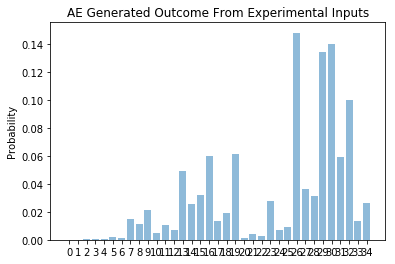

In [48]:
y_pos = np.arange(len(reconst_images[1]))

objects = list(range(len(reconst_images[1])))

plt.bar(y_pos, reconst_images[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('AE Generated Outcome From Experimental Inputs')

Text(0.5, 1.0, 'Brute Force Calculated Results')

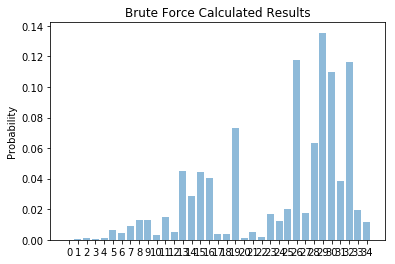

In [50]:
y_pos = np.arange(len(reconst_images[1]))

objects = list(range(len(reconst_images[1])))

plt.bar(y_pos, example_test[1], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Brute Force Calculated Results')

In [ ]:
y_test